# Leitura e tratamento dos dados

In [1]:
import pandas as pd
df = pd.read_csv('/content/rental_info.csv')

In [2]:
df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


The data they provided is in the csv file rental_info.csv. It has the following features:
- "rental_date": The date (and time) the customer rents the DVD.
- "return_date": The date (and time) the customer returns the DVD.
- "amount": The amount paid by the customer for renting the DVD.
- "amount_2": The square of "amount".
- "rental_rate": The rate at which the DVD is rented for.
- "rental_rate_2": The square of "rental_rate".
- "release_year": The year the movie being rented was released.
- "length": Lenght of the movie being rented, in minuites.
- "length_2": The square of "length".
- "replacement_cost": The amount it will cost the company to replace the DVD.
- "special_features": Any special features, for example trailers/deleted scenes that the DVD also has.
- "NC-17", "PG", "PG-13", "R": These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [3]:
# Dimensões do dataset
df.shape

(15861, 15)

In [4]:
# Informações detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [5]:
# Estatísticas descritivas dos atributos numéricos
df.describe()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100


Agora verificamos valores faltantes e dados inconsistentes.

In [6]:
# Verificar valores ausentes
df.isna().sum()

,0
rental_date,0
return_date,0
amount,0
release_year,0
rental_rate,0
length,0
replacement_cost,0
special_features,0
NC-17,0
PG,0


Vamos agora analisar colunas que precisam de transformação:

- Datas de aluguel e devolução;
- A coluna `special_features`, que contém múltiplos valores categóricos;
- A criação da variável alvo: **duração do aluguel**.

In [7]:
# Converter colunas de data para datetime
df["rental_date"] = pd.to_datetime(df["rental_date"])
df["return_date"] = pd.to_datetime(df["return_date"])

# Criar a variável target
df["rental_length"] = df["return_date"] - df["rental_date"]
df["rental_length_days"] = df["rental_length"].dt.days

# Visualizar resultado
df[["rental_date", "return_date", "rental_length_days"]].head()


,rental_date,return_date,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,4


Vamos transformar a coluna `special_features` em variáveis binárias,
pois modelos de Machine Learning não lidam diretamente com texto categórico.

In [13]:
df["deleted_scenes"] = df["special_features"].str.contains("Deleted Scenes").astype(int)
df["behind_the_scenes"] = df["special_features"].str.contains("Behind the Scenes").astype(int)

Agora iremos remover colunas inúteis para os modelos:
- Datas e colunas auxiliares
- Texto bruto de special_features

In [14]:
cols_to_drop = ["special_features", "rental_length", "rental_date", "return_date"]
df = df.drop(columns=cols_to_drop)

df.head()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days,deleted_scenes,behind_the_scenes
0,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,3,0,1
1,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,0,1
2,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,7,0,1
3,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,0,1
4,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,4,0,1


# Modelo 1 — Regressão Linear

A Regressão Linear é utilizada como **modelo base (baseline)** neste projeto.

### Por que usar Regressão Linear?

Ela foi escolhida porque:

- É simples e rápida;
- Tem fácil interpretação;
- Serve como referência para avaliar modelos mais complexos;
- Mostra relações lineares diretas entre as variáveis e a duração do aluguel.

Mesmo não sendo o melhor modelo para capturar interações complexas,
ela é excelente como ponto de comparação.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Separar target e features
X = df.drop("rental_length_days", axis=1)
y = df["rental_length_days"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((12688, 14), (3173, 14))

Agora treinamos o modelo de Regressão Linear e avaliamos seu desempenho
utilizando o Erro Quadrático Médio (MSE).


In [16]:
# Criar modelo
lin_reg = LinearRegression()

# Treinar
lin_reg.fit(X_train, y_train)

# Prever
y_pred_lin = lin_reg.predict(X_test)

# Métrica
mse_lin = mean_squared_error(y_test, y_pred_lin)

mse_lin


2.912643418194371

Quanto menor o MSE, melhor o modelo está estimando a duração do aluguel.

Vamos agora visualizar a importância das variáveis segundo a Regressão Linear.


In [17]:
coef_df = pd.DataFrame({
    "Variavel": X.columns,
    "Coeficiente": lin_reg.coef_
}).sort_values(by="Coeficiente", ascending=False)

coef_df


,Variavel,Coeficiente
0,amount,1.574587
5,NC-17,0.173575
6,PG,0.106281
7,PG-13,0.093888
13,behind_the_scenes,0.062804
1,release_year,0.009598
3,length,0.003571
10,length_2,-0.000011
4,replacement_cost,-0.001899
11,rental_rate_2,-0.002387


## Discussão dos Resultados — Modelo 1 (Regressão Linear)

O modelo apresentou MSE = 2.91, o que indica bom desempenho inicial.

O sinal negativo de rental_rate indica que quanto mais caro por dia,
menor tende a ser o tempo de aluguel.

Apesar do bom desempenho, a Regressão Linear não captura:
- Interações complexas;
- relações não lineares profundas;
- efeitos condicionais entre variáveis.

Por isso, será usado agora um modelo baseado em árvores.


# Modelo 2 — Random Forest Regressor

Utilizamos agora um modelo baseado em árvores: Random Forest.

## Por que escolhemos Random Forest?

Porque ela:

- Capta relações não lineares automaticamente;
- Detecta interações entre variáveis;
- Não exige normalização;
- Reduz overfitting comparado a uma única árvore;
- Normalmente é superior em dados tabulares.

Esse modelo é mais expressivo que a Regressão Linear e serve como
modelo principal neste problema.


Antes de otimizar, vamos treinar um modelo simples:

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Modelo inicial sem tunagem
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test)

# Avaliação
mse_rf = mean_squared_error(y_test, y_pred_rf)

mse_rf


1.9651926932380133

Agora fazemos o ajuste de hiperparâmetros usando Random Search
para encontrar uma combinação melhor.


In [19]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "n_estimators": np.arange(50, 300, 50),
    "max_depth": np.arange(3, 20),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   random_state=42, scoring='neg_mean_squared_error')

In [20]:
# Melhores parâmetros encontrados
rand_search.best_params_

{'n_estimators': np.int64(100),
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': np.int64(15)}

In [21]:
rf_best = rand_search.best_estimator_

y_pred_rf_best = rf_best.predict(X_test)

mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)

mse_rf_best


1.9505722763870323

Agora vamos calcular a importância das variáveis segundo a Random Forest.


In [22]:
import pandas as pd

importances = pd.DataFrame({
    "Variavel": X.columns,
    "Importancia": rf_best.feature_importances_
}).sort_values(by="Importancia", ascending=False)

importances


,Variavel,Importancia
0,amount,0.310100
9,amount_2,0.304115
2,rental_rate,0.099443
11,rental_rate_2,0.091103
4,replacement_cost,0.046951
10,length_2,0.039008
3,length,0.038986
1,release_year,0.028925
13,behind_the_scenes,0.008507
12,deleted_scenes,0.008323


## Discussão dos Resultados — Random Forest

O modelo apresentou MSE = 1.95 após otimização.

Isso representa:
- Forte ganho em relação à Regressão Linear;
- Melhor modelagem de relações não lineares;
- Maior sensibilidade a variações de preço e duração.

Isso mostra que a relação entre preço, duração e custo
não é linear, justificando a superioridade da Random Forest.

O modelo mostrou mais adequado para o problema.


# Ensemble de Modelos

A técnica de ensemble combina múltiplos modelos
para obter previsões mais estáveis e precisas.

A ideia é que:
- Cada modelo aprende padrões diferentes;
- Seus erros acabam se compensando.

Vamos testar dois formatos:
1) Média simples das previsões;
2) Média ponderada favorecendo o melhor modelo individual.


In [23]:
# Regressão linear
y_pred_lin = lin_reg.predict(X_test)

# Random Forest
y_pred_rf = rf_best.predict(X_test)


Ensemble simples (média)

In [24]:
import numpy as np

y_pred_ensemble_mean = (y_pred_lin + y_pred_rf) / 2

mse_ensemble_mean = mean_squared_error(y_test, y_pred_ensemble_mean)

mse_ensemble_mean

2.1619201470547313

Ensemble ponderado: Daremos mais peso à Random Forest, pois foi o modelo superior.

In [25]:
w_rf = 0.7
w_lr = 0.3

y_pred_ensemble_weighted = (w_lr * y_pred_lin) + (w_rf * y_pred_rf)

mse_ensemble_weighted = mean_squared_error(y_test, y_pred_ensemble_weighted)

mse_ensemble_weighted


2.012655950731019

# Comparação Final dos Modelos


In [26]:
resultados = pd.DataFrame({
    "Modelo": ["Regressão Linear", "Random Forest", "Ensemble Média", "Ensemble Ponderado"],
    "MSE": [mse_lin, mse_rf_best, mse_ensemble_mean, mse_ensemble_weighted]
})

resultados.sort_values(by="MSE")


,Modelo,MSE
1,Random Forest,1.950572
3,Ensemble Ponderado,2.012656
2,Ensemble Média,2.161920
0,Regressão Linear,2.912643


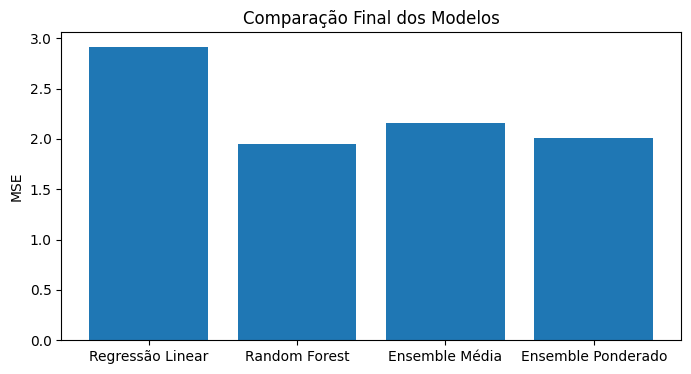

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(resultados["Modelo"], resultados["MSE"])
plt.title("Comparação Final dos Modelos")
plt.ylabel("MSE")
plt.show()


# Conclusão Final

Os resultados demonstram que:

- A Regressão Linear serviu como baseline;
- A Random Forest apresentou o melhor desempenho individual (MSE = 1.95);
- O Ensemble não superou a Random Forest.

Isso indica que:
- Os padrões do conjunto de dados são fortemente não lineares;
- A Random Forest capturou quase toda a estrutura relevante sozinha;
- A Regressão Linear não acrescentou diversidade útil ao ensemble.
